In [ ]:
from fastai import *
import torch

In [ ]:
n = 100

In [ ]:
x = torch.ones(n,2, dtype=torch.float)


In [ ]:
x[:,[0]]=x[:,[0]].uniform_(-1,1)
x[:10,:]

tensor([[ 0.5590,  1.0000],
        [-0.4626,  1.0000],
        [ 0.3421,  1.0000],
        [ 0.4311,  1.0000],
        [-0.1127,  1.0000],
        [-0.2310,  1.0000],
        [ 0.5081,  1.0000],
        [-0.3583,  1.0000],
        [ 0.4754,  1.0000],
        [ 0.6816,  1.0000]])

In [ ]:
a = torch.tensor([3.,1.], dtype=torch.float)
a

tensor([3., 1.])

In [ ]:
y = x@a+torch.rand(n)
y.shape

torch.Size([100])

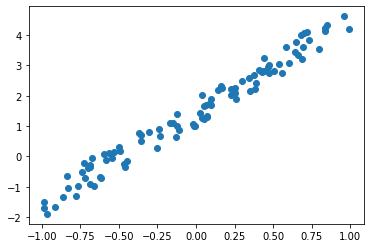

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],y)
plt.show()

In [ ]:
def mse(y_hat,y):
  return ((y-y_hat)**2).mean()

In [ ]:
a_train = torch.tensor([-1,1], dtype=torch.float)
y_hat = x@a_train 
mse(y_hat, y)

tensor(4.9954)

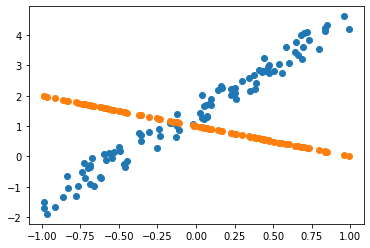

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a_train)

In [ ]:
def update(lr,t):
  y_hat = x@a_train 
  loss = mse(y_hat,y)
  if t % 10==0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a_train.sub_(lr*a_train.grad)
    a_train.grad.zero_()


In [ ]:
lr=1e-1
print(a_train.requires_grad_(True))
for t in range(100): update(lr,t)

tensor([-1.,  1.], requires_grad=True)
tensor(4.9954, grad_fn=<MeanBackward0>)
tensor(1.5248, grad_fn=<MeanBackward0>)
tensor(0.5184, grad_fn=<MeanBackward0>)
tensor(0.2135, grad_fn=<MeanBackward0>)
tensor(0.1209, grad_fn=<MeanBackward0>)
tensor(0.0929, grad_fn=<MeanBackward0>)
tensor(0.0843, grad_fn=<MeanBackward0>)
tensor(0.0818, grad_fn=<MeanBackward0>)
tensor(0.0810, grad_fn=<MeanBackward0>)
tensor(0.0807, grad_fn=<MeanBackward0>)


tensor([3.0343, 1.4734])


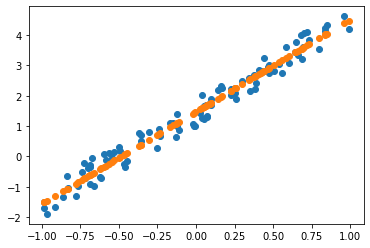

In [ ]:
print(a_train.detach_())
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@(a_train))

In [ ]:
path = '/content/mnist.pkl.gz'

In [ ]:
from fastai.basics import *
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')


In [ ]:
print(x_train.shape)

(50000, 784)


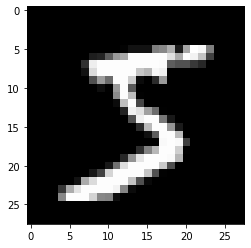

In [ ]:
plt.imshow(x_train[0].reshape((28,28)), cmap='gray')

In [ ]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c=x_train.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [ ]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [ ]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [ ]:
class MNIST_LOGNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.L1 = nn.Linear(784,10)

  def forward(self, x_b):
    return self.L1(x_b)


In [ ]:
class MNIST_LOGNN2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.L1 = nn.Linear(784,64)
    self.L2 = nn.Linear(64,10)

  def forward(self, x_b):
    x = self.L1(x_b)
    x = F.relu(x)
    return self.L2(x)

In [ ]:
model = MNIST_LOGNN().cuda()

In [ ]:
model.L1

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
model

MNIST_LOGNN(
  (L1): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
[print(p, "------->",p.shape) for p in model.parameters()]

Parameter containing:
tensor([[-2.5881e-02,  3.0154e-02, -1.6055e-02,  ..., -3.1735e-02,
         -2.6400e-02, -1.7842e-02],
        [-9.7823e-03,  3.4164e-03, -2.9775e-02,  ...,  3.4495e-02,
          2.5700e-02, -3.3220e-02],
        [ 3.0152e-02,  1.2818e-02, -9.9257e-04,  ...,  8.2789e-04,
          2.8467e-02, -2.9630e-02],
        ...,
        [-1.1805e-02,  1.7750e-02, -9.8776e-03,  ...,  3.4236e-02,
          2.7578e-02,  1.9233e-02],
        [ 3.0898e-05,  2.0806e-02, -3.2683e-02,  ..., -1.5847e-02,
         -1.4531e-02,  1.7826e-02],
        [ 2.2938e-02,  7.7431e-03, -1.2070e-02,  ..., -1.6878e-02,
         -8.7092e-03, -9.3980e-03]], device='cuda:0', requires_grad=True) -------> torch.Size([10, 784])
Parameter containing:
tensor([ 0.0257,  0.0095, -0.0218, -0.0243, -0.0328,  0.0265,  0.0295, -0.0320,
        -0.0120, -0.0150], device='cuda:0', requires_grad=True) -------> torch.Size([10])


[None, None]

In [ ]:
loss_f = torch.nn.CrossEntropyLoss()

In [ ]:
def logupdate(x,y,lr, m):
  wd=0.1
  y_hat = m(x)
  w=0.
  for p in model.parameters():
    w+=(p**2).sum()
  loss = loss_f(y_hat, y)+ w*wd
  loss.backward()
  with torch.no_grad():
    for p in m.parameters():

      p.sub_(lr*p.grad)
      p.grad.zero_()
  return loss.item()

In [ ]:
lr = 1e-1
losses = [logupdate(x,y,lr,model) for x,y in data.train_dl]

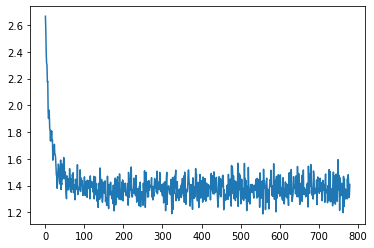

In [ ]:
plt.plot(losses)

In [ ]:
model2 =MNIST_LOGNN2().cuda()

In [ ]:
model2

MNIST_LOGNN2(
  (L1): Linear(in_features=784, out_features=64, bias=True)
  (L2): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
[print("------>",p.shape) for p in model2.parameters()]

------> torch.Size([64, 784])
------> torch.Size([64])
------> torch.Size([10, 64])
------> torch.Size([10])


[None, None, None, None]

In [ ]:
losses2 = [logupdate(x,y,lr,model2) for x,y in data.train_dl]

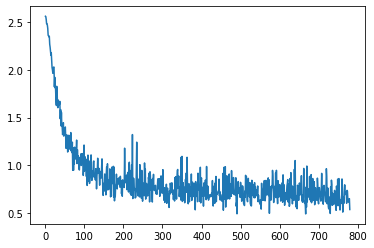

In [ ]:
plt.plot(losses2)

In [ ]:
def update(x,y,lr, m):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = m(x)
    loss = loss_f(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [ ]:
losses3 = [update(x,y,1e-3,model2) for x,y in data.train_dl]

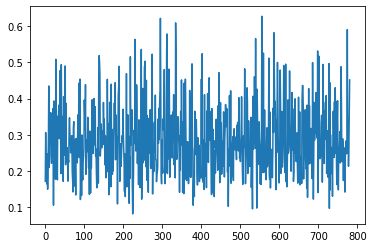

In [ ]:
plt.plot(losses3)